Traffic Sign Classification Model1_30x30.h5(Model 1)

Model Accuracy on test data : *65.35%*

Model.h5 - Model Trained on 64 x 64 image shape
Model1_30X30.h5 - Model trained on 30 X 30 image shape. 

Trying to change the kernel size. Earlier I tried with 3,3 - > 65.35%

Now let's try to change it to 5,5 -> 64.73%

Now let's try to change it to 7,7 -> 63.5%

This time instead of trying with kernel size, lets play with the no. of convolution and max pooling layers = 50.95%

Lets now keep only 1 Conv an Max Pooling layers - 53.75%

Changing the architecture to Conv -> Conv -> Max Pooling -> Flatten .... increased the Accuracy to 69.15% (Model_5)

Now let's try to add another Conv layer before Max Pooling -> Conv -> Conv -> Conv -> Max Pooling -> Flatten .... -> (Model_6) -> 79.05%. 

Obviously it is increasing.

So lets add another Convolution layer... -> 83%

The change is not that great, so let's move forward.

Let's add another Pooling layer -> 95%

Try adding another Pooling layer -> 78%

Not good, so removing this

Changing the Pool_size = 3 -> 65%

Changing the Pool_size -> Both to 2,2 with stride 1 -> Increased to 93.74%.

But with stride 2, it was higher. So let's try with Stride 3. Maybe it increase in strides, increases the accuracy... -> 74%

So Stride of 2 is the sweet spot.

Now let's increase the number of Neurons in the hidden layer to 256 -> Reduced the no. of trainable parameters -> 88%

Let's decrease the number of neurons in the hidden layers to 64 -> 73.84%

128 seemed to do the trick, so I'll try adding another hidden layer with 128 neurons -> 90.10

Lets try reducing the second hidden layer's neurons to 64 -> 87%

Increased the second hidden layer's neuron to 256 -> 90.something%

Now coming back to just 1 hidden layer, with 128 and changing the Optimizer to SGD -> 5% lol. the output is quite confused, and so it has given a lot of 1's it seems, maybe even all 1's.

Going back to adam

Importing Required Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from imutils import paths
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout 

(30, 29, 3)


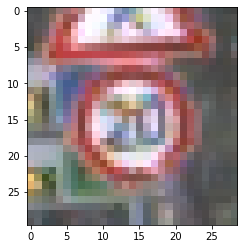

In [36]:
# Checking the shape of the original image
image = cv2.imread('C:\\Users\\Jatin Dhall\\Downloads\\archive\\Train\\0\\00000_00000_00000 (2).png')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
# img = cv2.resize(image, (1000,1000))
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
print(image.shape)

Loading the Image Data

In [37]:
imagePaths = list(paths.list_images("./Train"))

data = []
labels = []

count = 0
# Loop over the image paths
for imagePath in imagePaths:
  # Extract the class label from the fileName, load the image, and resize it to be a fixed 64 X 64 pixels
  label = imagePath.split(os.path.sep)[-2]
  image = cv2.imread(imagePath)
  image = cv2.resize(image,(30,30))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  print("Loading data : ",count)
  count+=1

  # Update the data and labels lists, respectively
  data.append(image)
  labels.append(label)


Loading data :  0
Loading data :  1
Loading data :  2
Loading data :  3
Loading data :  4
Loading data :  5
Loading data :  6
Loading data :  7
Loading data :  8
Loading data :  9
Loading data :  10
Loading data :  11
Loading data :  12
Loading data :  13
Loading data :  14
Loading data :  15
Loading data :  16
Loading data :  17
Loading data :  18
Loading data :  19
Loading data :  20
Loading data :  21
Loading data :  22
Loading data :  23
Loading data :  24
Loading data :  25
Loading data :  26
Loading data :  27
Loading data :  28
Loading data :  29
Loading data :  30
Loading data :  31
Loading data :  32
Loading data :  33
Loading data :  34
Loading data :  35
Loading data :  36
Loading data :  37
Loading data :  38
Loading data :  39
Loading data :  40
Loading data :  41
Loading data :  42
Loading data :  43
Loading data :  44
Loading data :  45
Loading data :  46
Loading data :  47
Loading data :  48
Loading data :  49
Loading data :  50
Loading data :  51
Loading data :  52
Loa

Converting lists into numpy arrays

In [ ]:
data = np.array(data)
labels = np.array(labels)

print(data)
print(labels)

Save the data and label

In [ ]:
np.save('./data_array1',data)
np.save('./labels_array1',labels)

Loading the data and label

In [ ]:
data = np.load('./data_array1.npy')
labels = np.load('./labels_array1.npy')

Checking the image and labels

(30, 30, 3)
0


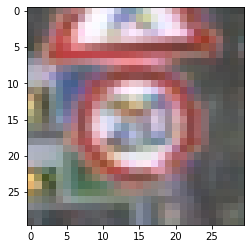

In [ ]:
# img = data[0]
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# print(img.shape)

# print(labels[0])

In [ ]:
print(data.shape , labels.shape)

(78418, 30, 30, 3) (78418,)


Train, Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size = 0.2, random_state=0)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(62734, 30, 30, 3) (15684, 30, 30, 3) (62734,) (15684,)


Converting labels to OneHotEncoding

In [ ]:
labels_encoded = to_categorical(labels, 43)

# print(Y_test[0])

Y_train = to_categorical(Y_train,43)
Y_test = to_categorical(Y_test,43)

print(labels_encoded)

print(Y_train)
print(Y_test)

print(len(Y_train[0]))

print(Y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
43
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Now we build the CNN model

In [ ]:
model = Sequential()

Convolution and Max Pooling Layer

In [ ]:
model.add(Conv2D(filters = 32,kernel_size = 3,activation='relu', input_shape = [30,30,1]))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(MaxPool2D(pool_size=2,strides=2))

Flattening

In [ ]:
model.add(Flatten())

Fully Connected Layers

In [ ]:
model.add(Dense(units = 128, activation = 'relu'))

Output Layer

In [ ]:
# We have 43 classes.
model.add(Dense(units = 43, activation = 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(X_train, Y_train, batch_size = 32, epochs = epochs, validation_data = (X_test, Y_test))

Epoch 1/20
1961/1961 [==============================] - 209s 105ms/step - loss: 0.4738 - accuracy: 0.8902 - val_loss: 0.1157 - val_accuracy: 0.9695
Epoch 2/20
1961/1961 [==============================] - 198s 101ms/step - loss: 0.0780 - accuracy: 0.9811 - val_loss: 0.0379 - val_accuracy: 0.9895
Epoch 3/20
1961/1961 [==============================] - 195s 100ms/step - loss: 0.0543 - accuracy: 0.9862 - val_loss: 0.0359 - val_accuracy: 0.9916
Epoch 4/20
1961/1961 [==============================] - 201s 102ms/step - loss: 0.0479 - accuracy: 0.9888 - val_loss: 0.0542 - val_accuracy: 0.98621s
Epoch 5/20
1961/1961 [==============================] - 260s 133ms/step - loss: 0.0410 - accuracy: 0.9909 - val_loss: 0.0115 - val_accuracy: 0.9974
Epoch 6/20
1961/1961 [==============================] - 230s 117ms/step - loss: 0.0431 - accuracy: 0.9912 - val_loss: 0.0187 - val_accuracy: 0.9945
Epoch 7/20
1961/1961 [==============================] - 211s 108ms/step - loss: 0.0354 - accuracy: 0.9926 - va

Save the model

In [ ]:
model.save("./Model1_30X30_final.h5")

Load the Model

In [ ]:
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 conv2d_57 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 conv2d_58 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 conv2d_59 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                

Defining the class labels(Texts)

In [ ]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Vehicle > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing vehicle > 3.5 tons' }

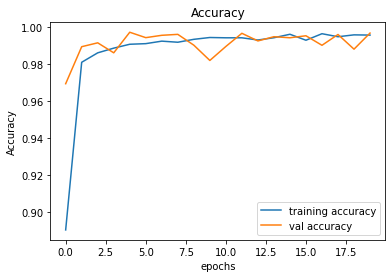

In [ ]:
#Accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

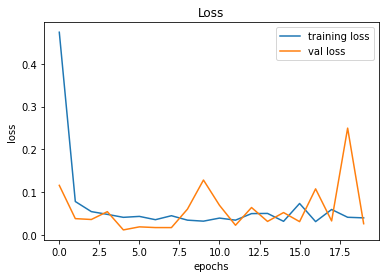

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Testing

Extracting Test Images

In [ ]:
csv = pd.read_csv("./Test.csv")

label = csv["ClassId"].values
imgs = csv["Path"].values
data = []

# print(label)
print(imgs)

count = 0
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    count+=1

X_test = np.array(data)
print(count)
print(X_test)

['Test/00000.png' 'Test/00001.png' 'Test/00002.png' ... 'Test/12627.png'
 'Test/12628.png' 'Test/12629.png']
12630
[[[[116 140 175]
   [116 138 171]
   [119 138 173]
   ...
   [102 119 150]
   [101 122 149]
   [ 93 112 139]]

  [[116 142 177]
   [116 141 175]
   [117 141 174]
   ...
   [120 143 178]
   [122 144 176]
   [122 142 174]]

  [[118 142 174]
   [116 141 175]
   [114 140 172]
   ...
   [121 144 181]
   [122 144 180]
   [119 142 178]]

  ...

  [[117 137 168]
   [115 135 165]
   [116 135 164]
   ...
   [116 138 170]
   [116 136 168]
   [118 139 171]]

  [[116 136 166]
   [115 134 167]
   [115 133 165]
   ...
   [114 135 168]
   [116 136 166]
   [115 139 167]]

  [[112 135 166]
   [111 134 165]
   [119 135 166]
   ...
   [115 137 166]
   [117 138 167]
   [114 140 170]]]


 [[[ 62  72  61]
   [ 89  81  63]
   [ 94  82  65]
   ...
   [ 78  64  68]
   [ 72  65  67]
   [ 74  68  68]]

  [[ 64  72  60]
   [ 97  83  65]
   [ 97  81  63]
   ...
   [ 75  63  65]
   [ 93  69  71]
   [ 88

PREDICTION STEP

In [ ]:
Y_Prediction = model.predict(x = X_test, steps=len(X_test), verbose = 1)
np.round(Y_Prediction)
print(Y_Prediction)

12630/12630 [==============================] - 50s 4ms/step
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.02073197e-27 5.66677372e-10 1.47423007e-08 ... 5.98727491e-12
  7.28937231e-16 1.13040475e-08]
 [0.00000000e+00 8.85896634e-24 1.62270039e-17 ... 3.75047925e-16
  2.76035681e-26 1.72941564e-10]
 [0.00000000e+00 1.68750936e-24 7.04089586e-17 ... 1.06411254e-23
  4.16176566e-34 5.78542787e-19]]


Analyzing the prediction matrix

43
Prediction Matrix
[1.0000000e+00 1.8310423e-22 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.0277992e-15 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00]
***Predicted class***
0
Speed limit (20km/h)
***Actual Class***
0
Speed limit (20km/h)


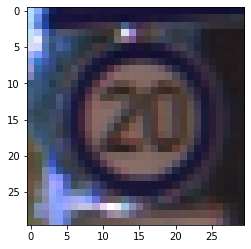

In [ ]:
img_no = 243
img = X_test[img_no]
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
print(len(Y_Prediction[img_no]))
class_predicted = np.argmax(Y_Prediction[img_no])
print("Prediction Matrix")
print(Y_Prediction[img_no])
print("***Predicted class***")
print(class_predicted)
print(classes[class_predicted])
print("***Actual Class***")
print(label[img_no])
print(classes[label[img_no]])

Extracting classes from the prediction matrix for each test image

In [ ]:
predicted_classes = []
for i in range(len(Y_Prediction)):
    predicted_classes.append(np.argmax(Y_Prediction[i]))

predicted_classes = np.array(predicted_classes)
print(predicted_classes)
print(label)

[16  1 38 ...  6  7 10]
[16  1 38 ...  6  7 10]


Accuracy Score Calculations

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, predicted_classes))

0.9436262866191607


Function to predict the traffic sign 

In [ ]:
def predict_traffic_sign(image):
    # image = [image]
    pred = model.predict(x = image, steps=1, verbose = 1)
    pred_class = np.argmax(pred)
    return classes[pred_class]

In [ ]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Vehicle > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing vehicle > 3.5 tons' }

1/1 [==============================] - 0s 151ms/step
Road work


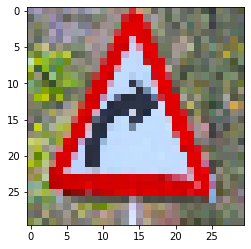

In [ ]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
import numpy as np
model = load_model("./Model1_30X30_final.h5")

# img =  cv2.imread('C:\\Users\\Jatin Dhall\\Downloads\\archive\\Test\\12223 (2).png')
img = cv2.imread('./jhpolice_sl_crs2.jpg')
# img = cv2.imread('./test_img.png')
img = cv2.resize(img,(30,30))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
img = img.reshape(1,30,30,3) 
print(predict_traffic_sign(img))